In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("lab07.ipynb")

/home/codespace/.local/lib/python3.12/site-packages/nbformat/__init__.py:96: MissingIDFieldWarning: Cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)


# Lab 7: Great British Bake Off (A/B Test)

Welcome to Data 8 Lab 7! This week's lab will focus on A/B Testing using data from the ever-popular British television show, [*The Great British Bake Off*](https://en.wikipedia.org/wiki/The_Great_British_Bake_Off).

#### **Helpful Resource:**
- [Python Reference](http://data8.org/sp24/reference/)

**Recommended Readings:**

* [Error Probabilities](https://inferentialthinking.com/chapters/11/4/Error_Probabilities.html)
* [A/B Testing](https://inferentialthinking.com/chapters/12/1/AB_Testing.html)

In [2]:
# Run this cell to set up the notebook, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
#warnings.simplefilter('ignore', (FutureWarning, np.VisibleDeprecationWarning))


## 1. A/B Testing

A/B testing is a form of hypothesis testing that allows you to make comparisons between two distributions. We may also refer to an A/B test as a permutation test.

You'll almost never be explicitly asked to perform an A/B test. Make sure you can identify situations where the test is appropriate and know how to correctly implement each step. Oftentimes, we use an A/B test to determine whether or not two samples came from the same underlying distribution.

**Question 1.1.** The following statements are the steps of an A/B hypothesis test presented in a *random order*:

1. Choose a test statistic (typically the difference in means between two categories)

2. Shuffle the labels of the original sample, find your simulated test statistic, and repeat many times

3. Find the value of the observed test statistic

4. Calculate the p-value based off your observed and simulated test statistics

5. Define a null and alternate model

6. Use the p-value and p-value cutoff to draw a conclusion about the null hypothesis

Assign `ab_test_order` to an array of integers that contains the correct order of an A/B test, where the first item of the array is the first step of an A/B test and the last item of the array is the last step of an A/B test.


In [3]:
ab_test_order = ...

In [4]:
grader.check("q1_1")

q1_1 results:
    q1_1 - 1 result:
        ❌ Test case failed
        Trying:
            len(ab_test_order) == 6
        Expecting:
            True
        **********************************************************************
        Line 1, in q1_1 0
        Failed example:
            len(ab_test_order) == 6
        Exception raised:
            Traceback (most recent call last):
              File "/usr/local/python/3.12.1/lib/python3.12/doctest.py", line 1359, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q1_1 0[0]>", line 1, in <module>
                len(ab_test_order) == 6
                ^^^^^^^^^^^^^^^^^^
            TypeError: object of type 'ellipsis' has no len()

    q1_1 - 2 result:
        ❌ Test case failed
        Trying:
            np.allclose(np.array(ab_test_order)[:3] % 2 == 1, True) # Check the first three elements in your array.
        Expecting:
            True
        **********************************************************************
        Line 1, in q1_1 1
        Failed example:
            np.allclose(np.array(ab_test_order)[:3] % 2 == 1, True) # Check the first three elements in your array.
        Exception raised:
            Traceback (most recent call last):
              File "/usr/local/python/3.12.1/lib/python3.12/doctest.py", line 1359, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q1_1 1[0]>", line 1, in <module>
                np.allclose(np.array(ab_test_order)[:3] % 2 == 1, True) # Check the first three elements in your array.
                            ~~~~~~~~~~~~~~~~~~~~~~~^^^^
            IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

    q1_1 - 3 result:
        ❌ Test case failed
        Trying:
            np.allclose(np.array(ab_test_order)[3:] % 2 == 0, True) # Check the last three elements in your array.
        Expecting:
            True
        **********************************************************************
        Line 1, in q1_1 2
        Failed example:
            np.allclose(np.array(ab_test_order)[3:] % 2 == 0, True) # Check the last three elements in your array.
        Exception raised:
            Traceback (most recent call last):
              File "/usr/local/python/3.12.1/lib/python3.12/doctest.py", line 1359, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q1_1 2[0]>", line 1, in <module>
                np.allclose(np.array(ab_test_order)[3:] % 2 == 0, True) # Check the last three elements in your array.
                            ~~~~~~~~~~~~~~~~~~~~~~~^^^^
            IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

    q1_1 - 4 result:
        ❌ Test case failed
        Trying:
            import hashlib
        Expecting nothing
        ok
        Trying:
            def get_hash(num):
                """Helper function for assessing correctness."""
                return hashlib.md5(str(num).encode()).hexdigest()
        Expecting nothing
        ok
        Trying:
            get_hash(np.array(ab_test_order).astype(int))
        Expecting:
            'a7196ed0f271c873d9750cb92422d911'
        **********************************************************************
        Line 8, in q1_1 3
        Failed example:
            get_hash(np.array(ab_test_order).astype(int))
        Exception raised:
            Traceback (most recent call last):
              File "/usr/local/python/3.12.1/lib/python3.12/doctest.py", line 1359, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q1_1 3[2]>", line 1, in <module>
                get_hash(np.array(ab_test_order).astype(int))
                         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
            TypeError: int() argument must be a string, a bytes-like object or a real number, not 'ellipsis'

**Question 1.2.** If the null hypothesis of an A/B test is correct, should the order of labels affect the differences in means between each group? Why do we shuffle labels in an A/B test? If you are in a lab section, confirm your answer with a neighbor or staff member before moving on. 


_Type your answer here, replacing this text._

## 2. The Great British Bake Off

>"The Great British Bake Off (often abbreviated to Bake Off or GBBO) is a British television baking competition, produced by Love Productions, in which a group of amateur bakers compete against each other in a series of rounds, attempting to impress a group of judges with their baking skills" [Wikipedia](https://en.wikipedia.org/wiki/The_Great_British_Bake_Off)

For every week of the competition, the judges assign one contestant the title "Star Baker". Ultimately, one winner is crowned every season. Using this information, we would like to investigate how winning Star Baker awards affects the odds of winning a season of the show.

**Question 2.1.** We want to know whether winning more Star Baker awards ___causes___ a change in likelihood of winning the season.  Why is it not sufficient to compare star baker rates for winners and losers?


_Type your answer here, replacing this text._

### Running an Experiment

We are going to run the following hypothesis test to determine the association between winning and number of Star Baker awards. The population we are examining is every contestant from seasons 2 through 11 of GBBO. We are going to use the following null and alternative hypotheses:

**Null hypothesis:** The distribution of Star Baker awards between contestants who won their season and contestants who did not win their season is the same.

**Alternative hypothesis:** Contestants who win their season of the show will win more Star Baker awards on average.

Our alternative hypothesis is related to our suspicion that contestants who win more Star Baker awards are more skilled, so they are more likely to win the season.

**Question 2.2.** Should we use an A/B test to test these hypotheses? If yes, what is our "A" group and what is our "B" group?


_Type your answer here, replacing this text._

Check your answers with your neighbors or a staff member before you move on to the next section.

The `bakers` table below describes the number of star baker awards each contest won and whether or not they won their season (`1` if they won, `0` if they did not win). The data was manually aggregated from Wikipedia for seasons 2-11 of the show. We randomized the order of rows as to not spoil the outcome of the show.

In [5]:
bakers = Table.read_table("star_bakers.csv")
bakers.show(3)

star baker awards,won
3,1
0,0
1,0


**Question 2.3.** Create a new table called `means` that contains the mean number of star baker awards for bakers who did not win (`won==0`) and bakers that did win (`won==1`). The table should have the column names `won` and `star baker awards mean`.

In [6]:
means = ...
means

Ellipsis

In [7]:
grader.check("q2_3")

q2_3 results:
    q2_3 - 1 result:
        ❌ Test case failed
        Trying:
            means.num_rows
        Expecting:
            2
        **********************************************************************
        Line 1, in q2_3 0
        Failed example:
            means.num_rows
        Exception raised:
            Traceback (most recent call last):
              File "/usr/local/python/3.12.1/lib/python3.12/doctest.py", line 1359, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q2_3 0[0]>", line 1, in <module>
                means.num_rows
            AttributeError: 'ellipsis' object has no attribute 'num_rows'

    q2_3 - 2 result:
        ❌ Test case failed
        Trying:
            np.round(min(means.column("star baker awards mean")), 2) == 0.65
        Expecting:
            True
        **********************************************************************
        Line 1, in q2_3 1
        Failed example:
            np.round(min(means.column("star baker awards mean")), 2) == 0.65
        Exception raised:
            Traceback (most recent call last):
              File "/usr/local/python/3.12.1/lib/python3.12/doctest.py", line 1359, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q2_3 1[0]>", line 1, in <module>
                np.round(min(means.column("star baker awards mean")), 2) == 0.65
                             ^^^^^^^^^^^^
            AttributeError: 'ellipsis' object has no attribute 'column'

    q2_3 - 3 result:
        ❌ Test case failed
        Trying:
            np.round(max(means.column("star baker awards mean")), 2) == 1.5
        Expecting:
            True
        **********************************************************************
        Line 1, in q2_3 2
        Failed example:
            np.round(max(means.column("star baker awards mean")), 2) == 1.5
        Exception raised:
            Traceback (most recent call last):
              File "/usr/local/python/3.12.1/lib/python3.12/doctest.py", line 1359, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q2_3 2[0]>", line 1, in <module>
                np.round(max(means.column("star baker awards mean")), 2) == 1.5
                             ^^^^^^^^^^^^
            AttributeError: 'ellipsis' object has no attribute 'column'

**Question 2.4.** Visualize the distribution of Star Baker awards for winners and non-winners as overlaid histograms. You should use the bins we provided.

Hint: You will want to use the group argument of `tbl.hist`. In order to produce several overlayed histograms based on unique values in a given column, we can do something like `tbl.hist(..., group=<col_name>, bins=...)`. This will graph one histogram for each unique value in the specified column all on a single plot.


In [8]:
useful_bins = np.arange(0, 7)
...

**Question 2.5.** We want to figure out if there is a difference between the distribution of Star Baker awards between winners and non winners. 

What should the test statistic be? Which values of this test statistic support the null, and which values support the alternative? **Assign `test_option` to the number corresponding to the correct test statistic.**

1. Absolute value of the difference between the means between both groups; high values support the null
2. Absolute value of the difference between the means between both groups; low values support the null
3. Average Star Baker awards for winners - average Star Baker awards for non-winners; high values support the null
4. Average Star Baker awards for winners - average Star Baker awards for non-winners; low values support the null

Before moving on, confirm your answer with a peer or in the discussion forums.

_Hint:_ You should think about what measures we use to describe a distribution. 


In [9]:
test_option = ...

In [10]:
grader.check("q2_5")

q2_5 results:
    q2_5 - 1 result:
        ❌ Test case failed
        Trying:
            test_option == 4
        Expecting:
            True
        **********************************************************************
        Line 1, in q2_5 0
        Failed example:
            test_option == 4
        Expected:
            True
        Got:
            False

**Question 2.6.** Set `observed_difference` to the observed test statistic using the `means` table. 


In [11]:
observed_difference = ...
observed_difference

Ellipsis

In [12]:
grader.check("q2_6")

q2_6 results:
    q2_6 - 1 result:
        ❌ Test case failed
        Trying:
            isinstance(observed_difference, float)
        Expecting:
            True
        **********************************************************************
        Line 1, in q2_6 0
        Failed example:
            isinstance(observed_difference, float)
        Expected:
            True
        Got:
            False

    q2_6 - 2 result:
        ❌ Test case failed
        Trying:
            float(round(observed_difference, 3))
        Expecting:
            0.848
        **********************************************************************
        Line 1, in q2_6 1
        Failed example:
            float(round(observed_difference, 3))
        Exception raised:
            Traceback (most recent call last):
              File "/usr/local/python/3.12.1/lib/python3.12/doctest.py", line 1359, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q2_6 1[0]>", line 1, in <module>
                float(round(observed_difference, 3))
                      ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
            TypeError: type ellipsis doesn't define __round__ method

**Question 2.7.** Given a table like `bakers`, a label column `label_col`, and a values column `val_col`, write a function that calculates the appropriate test statistic.

*Hint:* Make sure that you are taking the directionality of our alternative hypothesis into account.


In [13]:
def find_test_stat(tbl, label_col, val_col):
    ...

find_test_stat(bakers, "won", "star baker awards")

In [14]:
grader.check("q2_7")

q2_7 results:
    q2_7 - 1 result:
        ❌ Test case failed
        Trying:
            np.isclose(round(find_test_stat(bakers, "won", "star baker awards"), 3) - 0.848, 0)
        Expecting:
            True
        **********************************************************************
        Line 1, in q2_7 0
        Failed example:
            np.isclose(round(find_test_stat(bakers, "won", "star baker awards"), 3) - 0.848, 0)
        Exception raised:
            Traceback (most recent call last):
              File "/usr/local/python/3.12.1/lib/python3.12/doctest.py", line 1359, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q2_7 0[0]>", line 1, in <module>
                np.isclose(round(find_test_stat(bakers, "won", "star baker awards"), 3) - 0.848, 0)
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
            TypeError: type NoneType doesn't define __round__ method

When we run a simulation for A/B testing, we resample by **shuffling the labels** of the original sample. If the null hypothesis is true and the star baker award distributions are the same, we expect that the difference in mean star baker awards to not change when `"won"` labels are changed.

**Question 2.8.** Write a function `simulate_and_test_statistic` to compute one trial of our A/B test. Your function should run a simulation and return a test statistic.


In [15]:
def simulate_and_test_statistic(tbl, labels_col, values_col):
    ...

simulate_and_test_statistic(bakers, "won", "star baker awards")

In [16]:
grader.check("q2_8")

q2_8 results:
    q2_8 - 1 result:
        ❌ Test case failed
        Trying:
            test_stat = round(simulate_and_test_statistic(bakers, "won", "star baker awards"), 3)
        Expecting nothing
        **********************************************************************
        Line 1, in q2_8 0
        Failed example:
            test_stat = round(simulate_and_test_statistic(bakers, "won", "star baker awards"), 3)
        Exception raised:
            Traceback (most recent call last):
              File "/usr/local/python/3.12.1/lib/python3.12/doctest.py", line 1359, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q2_8 0[0]>", line 1, in <module>
                test_stat = round(simulate_and_test_statistic(bakers, "won", "star baker awards"), 3)
                            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
            TypeError: type NoneType doesn't define __round__ method
        Trying:
            -2 < test_stat < 2
        Expecting:
            True
        **********************************************************************
        Line 2, in q2_8 0
        Failed example:
            -2 < test_stat < 2
        Exception raised:
            Traceback (most recent call last):
              File "/usr/local/python/3.12.1/lib/python3.12/doctest.py", line 1359, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q2_8 0[1]>", line 1, in <module>
                -2 < test_stat < 2
                     ^^^^^^^^^
            NameError: name 'test_stat' is not defined

    q2_8 - 2 result:
        ❌ Test case failed
        Trying:
            np.random.seed(1)
        Expecting nothing
        ok
        Trying:
            test_stat2 = simulate_and_test_statistic(bakers, "won", "star baker awards")
        Expecting nothing
        ok
        Trying:
            np.round(test_stat2, 3) == -0.023 or np.round(test_stat2, 3) == -0.132
        Expecting:
            True
        **********************************************************************
        Line 3, in q2_8 1
        Failed example:
            np.round(test_stat2, 3) == -0.023 or np.round(test_stat2, 3) == -0.132
        Exception raised:
            Traceback (most recent call last):
              File "/usr/local/python/3.12.1/lib/python3.12/doctest.py", line 1359, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q2_8 1[2]>", line 1, in <module>
                np.round(test_stat2, 3) == -0.023 or np.round(test_stat2, 3) == -0.132
                ^^^^^^^^^^^^^^^^^^^^^^^
              File "/home/codespace/.local/lib/python3.12/site-packages/numpy/_core/fromnumeric.py", line 3758, in round
                return _wrapfunc(a, 'round', decimals=decimals, out=out)
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
              File "/home/codespace/.local/lib/python3.12/site-packages/numpy/_core/fromnumeric.py", line 54, in _wrapfunc
                return _wrapit(obj, method, *args, **kwds)
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
              File "/home/codespace/.local/lib/python3.12/site-packages/numpy/_core/fromnumeric.py", line 46, in _wrapit
                result = getattr(arr, method)(*args, **kwds)
                         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
            TypeError: unsupported operand type(s) for *: 'NoneType' and 'float'

**Question 2.9.** Simulate 5000 trials of our A/B test and store the test statistics in an array called `differences`.


In [17]:
# This cell might take a couple seconds to run
differences = make_array()

...
                                                 
differences

array([], dtype=float64)

In [18]:
grader.check("q2_9")

q2_9 results:
    q2_9 - 1 result:
        ❌ Test case failed
        Trying:
            len(differences)
        Expecting:
            5000
        **********************************************************************
        Line 1, in q2_9 0
        Failed example:
            len(differences)
        Expected:
            5000
        Got:
            0

    q2_9 - 2 result:
        ❌ Test case failed
        Trying:
            abs(np.average(differences)) < 0.05 # On average, your test statistic should be close to 0
        Expecting:
            True
        /home/codespace/.local/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:562: RuntimeWarning: Mean of empty slice.
          avg = a.mean(axis, **keepdims_kw)
        /home/codespace/.local/lib/python3.12/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
          ret = ret.dtype.type(ret / rcount)
        **********************************************************************
        Line 1, in q2_9 1
        Failed example:
            abs(np.average(differences)) < 0.05 # On average, your test statistic should be close to 0
        Expected:
            True
        Got:
            False

    q2_9 - 3 result:
        ❌ Test case failed
        Trying:
            all(differences == differences.item(0)) == False # Make sure all of the test statistics are different
        Expecting:
            True
        **********************************************************************
        Line 1, in q2_9 2
        Failed example:
            all(differences == differences.item(0)) == False # Make sure all of the test statistics are different
        Exception raised:
            Traceback (most recent call last):
              File "/usr/local/python/3.12.1/lib/python3.12/doctest.py", line 1359, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q2_9 2[0]>", line 1, in <module>
                all(differences == differences.item(0)) == False # Make sure all of the test statistics are different
                                   ^^^^^^^^^^^^^^^^^^^
            IndexError: index 0 is out of bounds for axis 0 with size 0

Run the cell below to view a histogram of your simulated test statistics plotted with your observed test statistic.

/home/codespace/.local/lib/python3.12/site-packages/numpy/lib/_histograms_impl.py:902: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


TypeError: float() argument must be a string or a real number, not 'ellipsis'

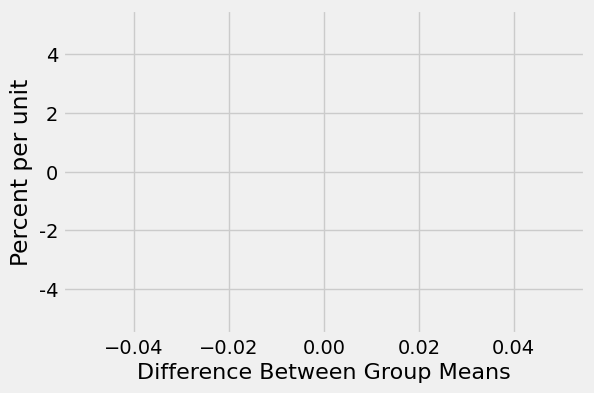

In [19]:
Table().with_column('Difference Between Group Means', differences).hist(bins=20)
plots.scatter(observed_difference, 0, color='red', s=30, zorder=2)
plots.ylim(-0.1, 1.35);

**Question 2.10.** Find the p-value for your test and assign it to `empirical_p`.


In [ ]:
empirical_p = ...
empirical_p

In [ ]:
grader.check("q2_10")

**Question 2.11.** Using a 5% P-value cutoff, draw a conclusion about the null and alternative hypotheses. Describe your findings using simple, non-technical language. What does your analysis tell you about the association between star baker awards and winning? What can you claim about causation from your statistical analysis? Confirm your answer with a peer, instructor or in the discussion forums. 


_Type your answer here, replacing this text._